In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import sys
sys.path.append('../../pytools')
import d2l
import matplotlib.pyplot as plt

d2l.gpu_mem_init()

2025-09-07 16:40:25.588494: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-07 16:40:25.654419: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-07 16:40:27.127855: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Memory growth enabled for PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'): True


In [2]:
mi_train,mi_test = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
len(mi_train[0]),len(mi_test[0])
mi_train[0][0].shape

(28, 28)

In [4]:
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [5]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img.numpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

I0000 00:00:1757234428.545148 4141219 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30827 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:00:08.0, compute capability: 7.0


array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

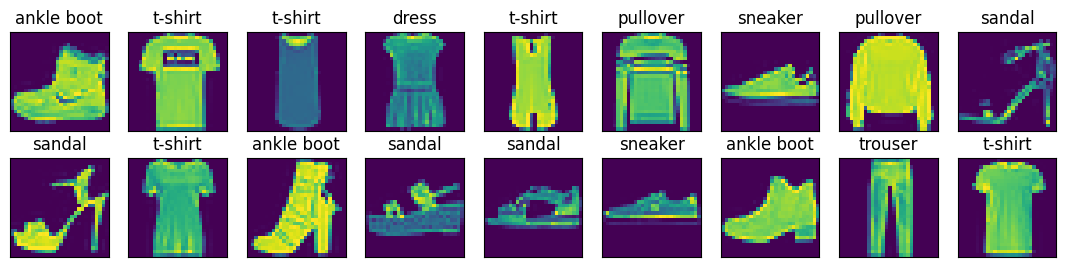

In [6]:
x = tf.constant(mi_train[0][:18])
y = tf.constant(mi_train[1][:18])
show_images(x, 2, 9, titles=get_fashion_mnist_labels(y))

In [7]:
batch_size = 256
train_iter = tf.data.Dataset.from_tensor_slices(mi_train).shuffle(len(mi_train[0]))

In [13]:
timer = d2l.Timer()
for x,y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'10.51 sec'

In [20]:
def load_data_fashion_mnist(batch_size, resize=None):
    mi_train,mi_test = tf.keras.datasets.fashion_mnist.load_data()
    process = lambda x,y : (tf.expand_dims(x, axis=3)/255, tf.cast(y, dtype='int32'))
    resize_fn = lambda x,y : (tf.image.resize_with_pad(x, resize, resize) if resize else x,y)
    return (tf.data.Dataset.from_tensor_slices(process(*mi_train)).shuffle(len(mi_train[0])).batch(batch_size).map(resize_fn),
            tf.data.Dataset.from_tensor_slices(process(*mi_test)).batch(batch_size).map(resize_fn))

In [21]:
train_iter,test_iter = load_data_fashion_mnist(32, 64)
for x,y in train_iter:
    print(x.shape, x.dtype, y.shape, y.dtype)
    break

(32, 64, 64, 1) <dtype: 'float32'> (32,) <dtype: 'int32'>
